In [1]:
%matplotlib notebook

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from scipy import stats
import statsmodels.api as sm

# to import package in parent folder first add the parent folder to path
import sys
import os
packages_path = Path(os.path.dirname(os.path.realpath('__file__'))).parent
sys.path.insert(0, str(packages_path))

import shared_func

from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from scipy import stats
import scikit_posthocs as sp
import pandas as pd

In [3]:
home_path = os.getcwd()

filepath = Path(home_path, 'Fig2_data')
savepath = Path(home_path, 'plots//SI')
stat_savepath = Path(home_path, 'stats')

Path(savepath).mkdir(parents=True, exist_ok=True) 
Path(stat_savepath).mkdir(parents=True, exist_ok=True) 
# Hyperscope data (larva) comes with 30 Hz image aquisition frequency
aq_rate = 30

# 656 nm data

In [4]:
filename = 'S4_656nm'
# read the numpy array
data_656 = np.load(Path(filepath, filename + '.npy'))
# and also read the metadata to have everything in one place
with open(Path(filepath, filename + '.txt')) as f:
    metadata = f.read()
    print(metadata)

This numpy array contains the data collected for the revisions:
attp1, 656 nm stim light, collected in parrallel with the 590 nm dat

Output data is organized the following way:

1st dimension is 600. These are the datapoints 

2nd dimension is 7. These are: Time, Stim, df/f1, df/f2, df/f3, df/f4, df/f5. 
Each df/f is a repeat on the same animal 

3rd dimension is 5, one for each animal 

4th dimension is 2. These are: 165uW/mm2 and 1076uW/mm2 

5th dimension is 1 containing Gal4+, ATR+ data





# 590 nm data

In [5]:
filename = 'S4_590nm'
# read the numpy array
data_590 = np.load(Path(filepath, filename + '.npy'))
# and also read the metadata to have everything in one place
with open(Path(filepath, filename + '.txt')) as f:
    metadata = f.read()
    print(metadata)

This numpy array contains the data collected for the revisions:
attp1, 590 nm stim light, collected in parrallel with the 656 nm data

Output data is organized the following way:

1st dimension is 600. These are the datapoints 

2nd dimension is 7. These are: Time, Stim, df/f1, df/f2, df/f3, df/f4, df/f5. 
Each df/f is a repeat on the same animal 

3rd dimension is 5, one for each animal 

4th dimension is 1. These are: 72uW/mm2 

5th dimension is 1 containing Gal4+, ATR+ data





<IPython.core.display.Javascript object>


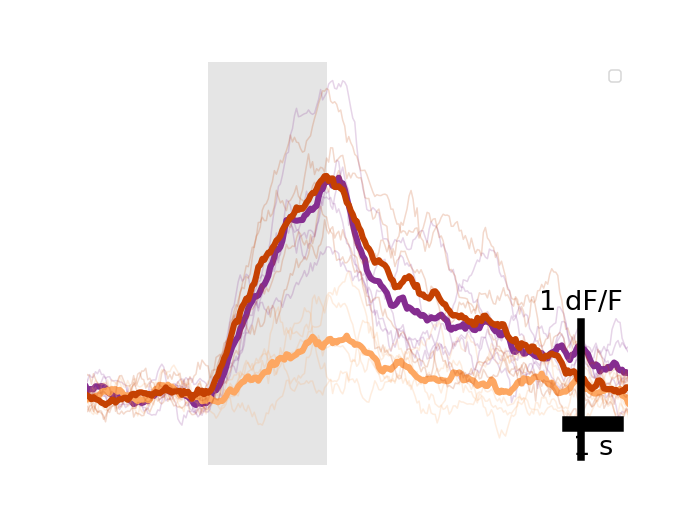

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [6]:
# Define colors used for this plot
start = 0.4
stop = 0.8
number_of_lines= 2
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [matplotlib.cm.Oranges(x) for x in cm_subsection ]
colors = np.array(colors)

colors_590 = [matplotlib.cm.BuPu(x) for x in cm_subsection ]
colors_590 = np.array(colors_590)


# Prepare the raw data for plotting
median_per_animal_656nm = shared_func.median_per_animal_func(aq_rate=aq_rate, data=data_656)
median_per_animal_590nm = shared_func.median_per_animal_func(aq_rate=aq_rate, data=data_590)

# Then, plot the trace plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Here we have only one group
group = 0

 
ax.plot(data_590[:,0,0,0,group], np.mean(median_per_animal_590nm[:,:,0,group], axis=1), 
        lw=4, zorder=1, color=colors_590[1])

ax.plot(data_590[:,0,0,0,group], median_per_animal_590nm[:,:,0,group], lw=1, zorder=1, 
        color=colors_590[1], alpha=0.2)


for stim_intensity in range(2):

    ax.plot(data_656[:,0,0,stim_intensity,group], median_per_animal_656nm[:,:,stim_intensity,group], lw=1, zorder=1, 
            color=colors[stim_intensity], alpha=0.2)
    # and plot the mean of the median in bold
    ax.plot(data_656[:,0,0,stim_intensity,group], np.mean(median_per_animal_656nm[:,:,stim_intensity,group], axis=1), 
            lw=4, zorder=1, color=colors[stim_intensity])


# Plot stimulus
start_stim = np.where(data_656[:, 1, 0, stim_intensity, 0] > 0.1)[0][0]
stop_stim = np.where(data_656[:, 1, 0, stim_intensity, 0] > 0.1)[0][-1]
ax.axvspan(data_656[start_stim, 0, 0, stim_intensity, 0],
           data_656[stop_stim, 0, 0, stim_intensity, 0],
           lw=0, zorder=0,
           color='k',
           alpha=0.1)
ax.set_xlim(1, 10)

fontprops = fm.FontProperties(size=18)
scalebar_time = AnchoredSizeBar(ax.transData,
                                1, '1 s', 'lower right',
                                pad=0.1,
                                color='black',
                                frameon=False,
                                size_vertical=0.1,
                                fontproperties=fontprops)

scalebar_df = AnchoredSizeBar(ax.transData,
                              0.1, '1 dF/F', 'lower right',
                              pad=0.1,
                              color='black',
                              frameon=False,
                              size_vertical=1,
                              fontproperties=fontprops,
                              label_top=True)

ax.add_artist(scalebar_time)
ax.add_artist(scalebar_df)
ax.legend()
ax.axis('off')

savename = 'S4_B.svg'
fig.savefig(Path(savepath, savename),
            transparent=True)

In [7]:
# Median values before and during
# For readability explicitly state what is being taken
before_start_index = int(round(start_stim-aq_rate*1)) # one second before start
before_end_index = start_stim

during_start_index = int(round(stop_stim-aq_rate*0.5)) # take half second before the end of the stimulus...
during_end_index = int(round(stop_stim+aq_rate*0.5)) # ...until half second after the end of the stimulus

median_before_stim_656nm = np.median(median_per_animal_656nm[before_start_index:start_stim, :, :],axis=0)
median_during_stim_656nm = np.median(median_per_animal_656nm[during_start_index:during_end_index, :, :],axis=0)

median_before_stim_590nm = np.median(median_per_animal_590nm[before_start_index:start_stim, :, :],axis=0)
median_during_stim_590nm = np.median(median_per_animal_590nm[during_start_index:during_end_index, :, :],axis=0)

<IPython.core.display.Javascript object>


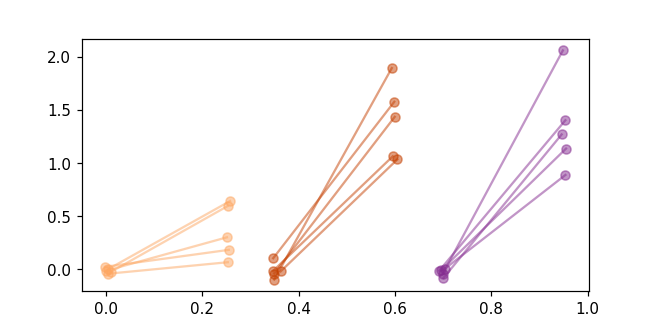

In [8]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

shared_func.plot_connected_scatterplot(ax, median_before_stim_656nm, median_during_stim_656nm, light_intensity=0, 
                           color=colors[0], start_x_position=0)
shared_func.plot_connected_scatterplot(ax, median_before_stim_656nm, median_during_stim_656nm, light_intensity=1, 
                           color=colors[1], start_x_position=0.35)

shared_func.plot_connected_scatterplot(ax, median_before_stim_590nm, median_during_stim_590nm, light_intensity=0, 
                           color=colors_590[1], start_x_position=0.7)
savename = 'S4C.svg'
fig.savefig(Path(savepath, savename),
            transparent=True)

In [9]:
p_values=[]

# median_before_stim.shape
# (5, 3, 1) # Animal, light intensity, group
# 656 nm!
shared_func.pairwise_t_tests(median_during_stim_656nm[:,0,0], median_before_stim_656nm[:,0,0], p_values) # 165 uW/mm2
shared_func.pairwise_t_tests(median_during_stim_656nm[:,1,0], median_before_stim_656nm[:,1,0], p_values) # 1076 uW/mm2
# 590 nm!
shared_func.pairwise_t_tests(median_during_stim_590nm[:,0,0], median_before_stim_590nm[:,0,0], p_values) # 73 uW/mm2

print('Holms-Bonferroni correction:')
shared_func.holms_bonferroni_correction(p_values)

lilliefors: 0.44992176410463947
T-Test
TtestResult(statistic=3.2907364892571875, pvalue=0.030194625409996526, df=4)


lilliefors: 0.48135491790096985
T-Test
TtestResult(statistic=8.291667189583455, pvalue=0.0011550549429415107, df=4)


lilliefors: 0.3048555468157399
T-Test
TtestResult(statistic=6.7960013917057625, pvalue=0.002448567969770143, df=4)


Holms-Bonferroni correction:
significantly different with:
current p: 0.0011550549429415107, current alpha: 0.016666666666666666
significantly different with:
current p: 0.002448567969770143, current alpha: 0.025
significantly different with:
current p: 0.030194625409996526, current alpha: 0.05


In [10]:
data = [[median_during_stim_656nm[:,0,0], median_before_stim_656nm[:,0,0]],
        [median_during_stim_656nm[:,1,0], median_before_stim_656nm[:,1,0]],
        [median_during_stim_590nm[:,0,0], median_before_stim_590nm[:,0,0]]
       ]

label_list_stat_export = [['During, 656nm, 166uW/mm2', 'Before, 656nm, 166uW/mm2'],
                          ['During, 656nm, 1076W/mm2', 'Before, 656nm, 1076W/mm2'],
                          ['During, 590nm, 73uW/mm2', 'Before, 590nm, 73uW/mm2']]
savename = 'S4C'

shared_func.export_pairwise_dependent_test(data, label_list_stat_export,
                                           savepath=stat_savepath, savename=savename,
                                           parametric=True)

                      Group  n      mean    median       STD       SEM  \
0  During, 656nm, 166uW/mm2  5  0.358496  0.301831  0.226603  0.045321   
1  Before, 656nm, 166uW/mm2  5 -0.010999 -0.014180  0.022652  0.004530   
2  During, 656nm, 1076W/mm2  5  1.403081  1.437592  0.324303  0.064861   
3  Before, 656nm, 1076W/mm2  5 -0.013230 -0.019811  0.065612  0.013122   
4   During, 590nm, 73uW/mm2  5  1.353658  1.271597  0.393606  0.078721   
5   Before, 590nm, 73uW/mm2  5 -0.027996 -0.012728  0.030606  0.006121   

                             95% CI on the mean  DOF statistical test  \
0     (0.043921291202762947, 0.673071676766265)  4.0       T-test rel   
1  (-0.04244513979018202, 0.020447852291933556)  NaN              NaN   
2      (0.9528767114726605, 1.8532861921116952)  4.0       T-test rel   
3   (-0.10431415588024374, 0.07785417961571207)  NaN              NaN   
4      (0.8072448501944797, 1.9000704306663398)  4.0       T-test rel   
5   (-0.0704838135768237, 0.014490820625925

# Compare between groups

<IPython.core.display.Javascript object>


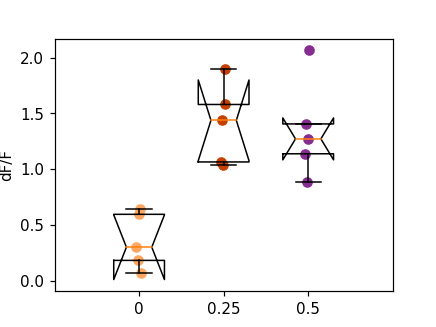

C:\Users\David\AppData\Local\Temp\ipykernel_11560\2983745921.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_1, median_during_stim_656nm[:,0,0], c=colors[0])
C:\Users\David\AppData\Local\Temp\ipykernel_11560\2983745921.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_2, median_during_stim_656nm[:,1,0], c=colors[1])
C:\Users\David\AppData\Local\Temp\ipykernel_11560\2983745921.py:12: UserWarni

In [11]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)

x_1 = np.random.normal(0, 0.005, size=median_during_stim_656nm[:,0,0].shape[0])
x_2 = np.random.normal(0.25, 0.005, size=median_during_stim_656nm[:,1,0].shape[0])
x_3 = np.random.normal(0.5, 0.005, size= median_during_stim_590nm[:,0,0].shape[0])

ax.scatter(x_1, median_during_stim_656nm[:,0,0], c=colors[0])
ax.boxplot(median_during_stim_656nm[:,0,0], positions=[0], notch = True, showfliers=False)
ax.scatter(x_2, median_during_stim_656nm[:,1,0], c=colors[1])
ax.boxplot(median_during_stim_656nm[:,1,0], positions=[0.25], notch = True, showfliers=False)
ax.scatter(x_3, median_during_stim_590nm[:,0,0], c=colors_590[1])
ax.boxplot(median_during_stim_590nm[:,0,0], positions=[0.5], notch = True, showfliers=False)

ax.set_xlim(-0.25, 0.75)
ax.set_ylabel('dF/F')
fig.savefig(Path(savepath, 'S4D.svg'))

# Stats

In [12]:
print(sm.stats.lilliefors(median_during_stim_656nm[:,0,0])[-1])
print(sm.stats.lilliefors(median_during_stim_656nm[:,1,0])[-1])
print(sm.stats.lilliefors(median_during_stim_590nm[:,0,0])[-1])
          
print(stats.levene(median_during_stim_656nm[:,0,0],
                   median_during_stim_656nm[:,1,0],
                   median_during_stim_590nm[:,0,0]))
print('\n')
print(stats.f_oneway(median_during_stim_656nm[:,0,0],
               median_during_stim_656nm[:,1,0],
               median_during_stim_590nm[:,0,0]))

0.560389205844528
0.5730900286134302
0.38858229891077656
LeveneResult(statistic=0.22941545044880132, pvalue=0.7984058826648481)


F_onewayResult(statistic=13.38234838882137, pvalue=0.0008799725583047823)


# Export stats

In [13]:
data = [median_during_stim_656nm[:,0,0],
        median_during_stim_656nm[:,1,0],
        median_during_stim_590nm[:,0,0]]
label_list = ['656nm, 166uW/mm2', '656nm, 1076uW/mm2', '590nm, 73uW/mm2']
savename = 'S4D'

shared_func.export_statistics_multiple(data, label_list,
                                       savepath=stat_savepath, savename=savename, parametric=True)



LeveneResult(statistic=0.22941545044880132, pvalue=0.7984058826648481)
Export statistics:
               Group  n      mean    median       STD       SEM  \
0    590nm, 73uW/mm2  5  1.353658  1.271597  0.393606  0.078721   
1  656nm, 1076uW/mm2  5  1.403081  1.437592  0.324303  0.064861   
2   656nm, 166uW/mm2  5  0.358496  0.301831  0.226603  0.045321   

                          95% CI on the mean   DOF statistical test  \
0   (0.8072448501944797, 1.9000704306663398)  12.0            ANOVA   
1   (0.9528767114726605, 1.8532861921116952)   NaN             <NA>   
2  (0.043921291202762947, 0.673071676766265)   NaN             <NA>   

   F statistic  p value significant  
0    13.382348  0.00088         YES  
1          NaN      NaN         NaN  
2          NaN      NaN         NaN  


                   656nm, 166uW/mm2  656nm, 1076uW/mm2  590nm, 73uW/mm2
656nm, 166uW/mm2           1.000000           0.001677         0.002435
656nm, 1076uW/mm2          0.001677           1.000000  

# Single animal plots

In [16]:
no_of_animals = 5

volt_index = 0

# For Color
start = 0.4
stop = 0.8
cm_subsection = np.linspace(start, stop, 3) 
colors = [ matplotlib.cm.Reds(x) for x in cm_subsection ]
colors = np.array(colors)

color = colors[0]


aq_rate = 30 # Hz
window_size = aq_rate * 1  # in seconds
if window_size % 2 == 0:  # Window size must be odd
    window_size += 1
# make sure window size is an integer
window_size = int(round(window_size))

shared_func.plot_individual_animals(data_656, no_of_animals, window_size, volt_index, color,
                       savepath=Path(savepath, 'S4_1_656nm_166uW.svg'))

<IPython.core.display.Javascript object>

In [17]:
no_of_animals = 5

volt_index = 1

# For Color
start = 0.4
stop = 0.8
cm_subsection = np.linspace(start, stop, 3) 
colors = [ matplotlib.cm.Reds(x) for x in cm_subsection ]
colors = np.array(colors)

color = colors[2]


aq_rate = 30 # Hz
window_size = aq_rate * 1  # in seconds
if window_size % 2 == 0:  # Window size must be odd
    window_size += 1
# make sure window size is an integer
window_size = int(round(window_size))

shared_func.plot_individual_animals(data_656, no_of_animals, window_size, volt_index, color,
                       savepath=Path(savepath, 'S4_2_656nm_1076uW.svg'))

<IPython.core.display.Javascript object>

In [18]:
no_of_animals = 5

volt_index = 0

# For Color
start = 0.4
stop = 0.8
cm_subsection = np.linspace(start, stop, 3) 
colors = [ matplotlib.cm.BuPu(x) for x in cm_subsection ]
colors = np.array(colors)

color = colors[2]


aq_rate = 30 # Hz
window_size = aq_rate * 1  # in seconds
if window_size % 2 == 0:  # Window size must be odd
    window_size += 1
# make sure window size is an integer
window_size = int(round(window_size))

shared_func.plot_individual_animals(data_590, no_of_animals, window_size, volt_index, color,
                       savepath=Path(savepath, 'S4_3_590nm_73uW.svg'))

<IPython.core.display.Javascript object>